In [1]:
import equinox as eqx
import jax.numpy as jnp
from jaxNRSur.SurrogateModel import SurrogateModel
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
time = jnp.linspace(-1000, 100, 100000)
params = jnp.array([0.9, 0.1, 0.1])
model = SurrogateModel("../NRHybSur3dq8.h5")

2023-09-30 17:07:02.014539: W external/xla/xla/service/gpu/nvptx_compiler.cc:596] The NVIDIA driver's CUDA version is 12.0 which is older than the ptxas CUDA version (12.1.105). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [3]:
h = model.get_waveform(time, params)

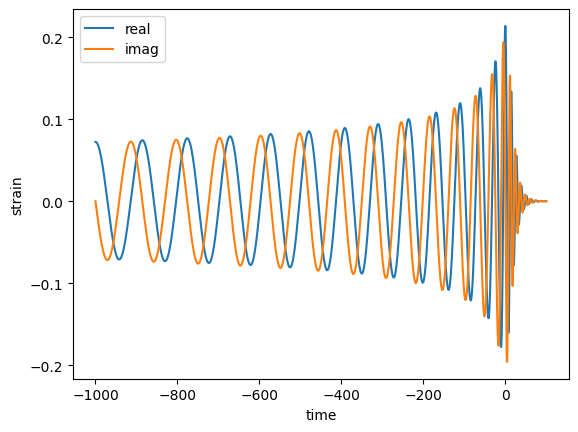

In [4]:
# Plot the waveform
plt.plot(time, h.real, label="real")
plt.plot(time, h.imag, label="imag")
plt.xlabel("time")
plt.ylabel("strain")
plt.legend()
plt.show()

In [5]:
# Compute the gradient of the waveform with respect to the parameters
def sum_f(params):
    return jnp.sum(model.get_waveform(time, params).real)
grad_f = eqx.filter_jit(eqx.filter_grad(sum_f))

In [6]:
grad_f(params)

Array([  5.66364832, 171.41020732, -17.68877819], dtype=float64)

In [7]:
# Vmap the waveform to compute the waveform for multiple parameters
params_multi = jnp.array([[0.9, 0.1, 0.1]])
params_multi = jnp.repeat(params_multi, 100, axis=0)
h_multi = eqx.filter_jit(eqx.filter_vmap(model.get_waveform, in_axes=(None, 0, None)))(
    time, params_multi
)